<a href="https://colab.research.google.com/github/zsunberg/ai4all-berkeley-driving/blob/master/DQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/zsunberg/ai4all-berkeley-driving
! pip install stable-baselines
! pip install celluloid
! pip install numpy==1.17.0

Cloning into 'ai4all-berkeley-driving'...
remote: Enumerating objects: 246, done.
remote: Counting objects: 100% (246/246), done.
remote: Compressing objects: 100% (162/162), done.
remote: Total 246 (delta 148), reused 175 (delta 83), pack-reused 0
Receiving objects: 100% (246/246), 8.28 MiB | 25.32 MiB/s, done.
Resolving deltas: 100% (148/148), done.
     |████████████████████████████████| 20.4MB 1.9MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


First, we're going to try and visualize how the effects of different exploration policies on the DQN agent. Run the code below to train a DQN agent that we're going to then play around with. It should take two to three minutes to finish up. It's a pretty long time, but at the end you have a car that can drive! 

[Errno 2] No such file or directory: 'ai4all-berkeley-driving'
/content/ai4all-berkeley-driving


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


--------------------------------------
| % time spent exploring  | 29       |
| episodes                | 100      |
| mean 100 episode reward | -7.2     |
| steps                   | 2170     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 200      |
| mean 100 episode reward | -7.1     |
| steps                   | 4410     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 300      |
| mean 100 episode reward | -7.4     |
| steps                   | 6721     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 400      |
| mean 100 episode reward | -7       |
| steps                   | 8864     |
--------------------------------------
Finished neural_net_10000


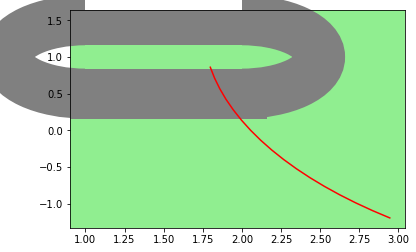

<Figure size 792x576 with 0 Axes>

In [25]:

%cd ai4all-berkeley-driving
from driving.ui import StudentQModel
model = StudentQModel(DrivingEnv())
model.train(n_steps=100000)

Lets talk a little bit about exploration. In the previous section, you learned that in Q learning you can find the optimal action by finding the action that maximizes the Q value. That is to say, for every state your Q-function returns the values of the different actions and you just pick the one that has the highest value. 

However, when you're training the model, you want it to try out lots of different states and actions so that it can find the best one. The reason is, before you've trained it, your Q function doesn't actually know what the best action is yet!
Suppose for a second that at some state **s** your Q-function thinks the best action is 0, i.e. turning left 30 degrees. In reality, the best action is 2: not turning at all. If you never try out action 2, you'll never find that out! So, we use what's known as an **exploration policy.**

Instead of just taking the action the Q function wants you to take, you occasionally just take a random action and see how it does. In the following code, we define a value **exploration_prob** that defines how often we take the Q value versus taking a totally random action. If **exploration_prob** is high, we'll take a random action more often, if it's low we'll take the action chosen by the Q function more often. Play around with it and see how the behavior changes!



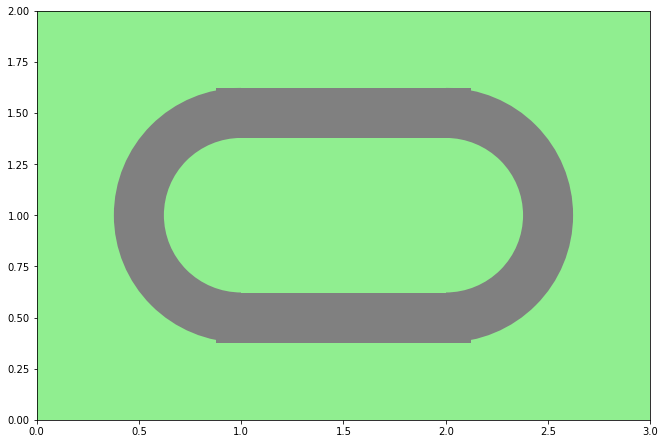

In [28]:
env = DrivingEnv()
# Play around with this value! How does changing exploration_prob affect how the car drives?
exploration_prob = 0.02
def explore(x, y, theta):
    prob = np.random.uniform(1)
    if prob > max(min(exploration_prob, .999), 0):
      return model.basicPolicy(x,y,theta)
    else:
      return env.actions[np.random.randint(len(env.actions))]
x = animate(env, explore, dt=0.2)
x

Now we have a trained policy, lets actually use it for selecting actions! For your convenience, I've defined a function that returns the "value" of each of the actions. Given what we've learned about how DQN selects actions, try to figure out a way to use these methods for action selection. Once you've finished, go down to cells and see how your controller does!

In [20]:
def return_action_value(x, y, theta, action):
    return model.q_value(x, y, theta, action)

def policy(x, y, theta):
    # Fill this in here. Your function should take in the x, y, theta and return a value between 0 and 8.
    # The question really is, given all my q values for different actions, which action should I take?
    # You can use the return_action_value function, it should be helpful.
    

SyntaxError: ignored

In [0]:
x = animate(env, policy, dt=0.2)
x

Okay, so that didn't work great. Here's the problem, we gave you a bad reward function! Lets take a look at what this reward function is. The following piece of code will plot the Q values you learned for different states and actions on the map. Can you figure out what's wrong?

In [30]:
from driving.ui import view_q_value
view_q_value(model)

Output()

So, now we're going to give you a challenge, try writing your own good reward function! Fill out the code block below with your function of x, y, and theta and use it to build the reward that gets your car to drive around the track. For your convenience, we've added some helper functions that you can use to build different pieces into your reward function. 

We've also added some code to help you visualize the reward function you've built. Once you've got something that you think 
is good based on the visualizer, run the cell below it to train and visualize your policy! 

**A hint**, you want your reward value to look kind of like the track! It should be high on the track and low elsewhere.

In [15]:
LinearDist = LinearDistanceAngleReward(make_oval())
from driving.ui import view_reward
env = DrivingEnv()
# Utility function, this might be helpful!
def distance_to_road(x, y, theta):
    """This function takes in x, y, theta and returns the current distance to the road."""
    d, delta_deg = LinearDist.map.distance_angle_deg(x,y,theta)
    return d
    
def reward_function(x, y, theta, action):
    # Put your code in here!
    # Put your code in here!
    # Put your code in here!
    # You should return a value that's a function of x, y, theta, and action!
  
def visualize_reward():
    env.reward = reward_function
    view_reward(env)

visualize_reward()

Output()

In [0]:
env = DrivingEnv()
env.reward = reward_function
model = StudentQModel(env)
model.train(n_steps=100000)
x = animate(env, model.basicPolicy, dt=0.2)
x